## GROUP PROJECT: Euklid Case

Master's Degree in Data Science and Management

Course: Machine Learning

Students: Gian Lorenzo Marchioni () - David Paquette () - Elena Tomasella (781321)


## DATASETS

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import missingno as msno

In [ ]:
ibm_df=pd.read_csv('/content/IBM_weekly.csv', sep=',', header=0)
ibm_df['Date'] = pd.to_datetime(ibm_df.Date)

In [ ]:
ibm_df_subset=ibm_df[ibm_df['Close']<ibm_df['Low']]

ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('2021-11-04'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('2021-11-04'),['Open', 'High', 'Low']]/1.046

# adjust for the 1999-05-27 split, plus the Open and High at 1999-05-30, which are an anomaly in the dataset
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1999-05-27'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1999-05-27'),['Open', 'High', 'Low']]/2
ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1999-05-30'),['Open', 'High']]=ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1999-05-30'),['Open', 'High']]/2

# adjust for the 1997-05-28 split, plus the Open and High at 1997-06-01, which are an anomaly in the dataset
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1997-05-28'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1997-05-28'),['Open', 'High', 'Low']]/2
ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1997-06-01'),['Open', 'High']]=ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1997-06-01'),['Open', 'High']]/2

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#scaler
scaler = StandardScaler()
scaler2 = MinMaxScaler()

#standardization of the prices
ibm_df[['Close', 'Open', 'Low', 'High']] = scaler.fit_transform(ibm_df[['Close', 'Open', 'Low', 'High']])
ibm_df.loc[ibm_df['Volume']>0, ['Volume']] = scaler2.fit_transform(ibm_df.loc[ibm_df['Volume']>0, ['Volume']])

## LSTM

TAKE CARE!! Run the notebook ONLY including the cells before ARIMA and then come here.

https://www.diariodiunanalista.it/posts/previsione-delle-serie-temporali-con-lstm-in-tensorflow/

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM?ref=diariodiunanalista.it

In [ ]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=be93ec4145536a7106d33575bd2696984db68f20fe3d33f0a8030f73125a6d9b
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import yfinance as yf
import pandas_ta as ta
import keras.models, keras.layers
import tensorflow as tf
import numpy as np

- ibm_df['RSI']=ta.rsi(ibm_df.Close, length=15): Here, the Relative Strength Index (RSI) indicator is being calculated for the ibm_df DataFrame. RSI is a momentum indicator that measures the speed and magnitude of price movements. It is calculated using the closing price (Close) data and specifying a length of 15 periods.
- ibm_df['EMAF']=ta.ema(ibm_df.Close, length=10): Here, the Exponential Moving Average (EMA) is being calculated for the ibm_df DataFrame. EMA is a trend indicator that assigns greater weight to more recent data. It is calculated using the closing price (Close) data and specifying a length of 20 periods.
- ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100): This line calculates another EMA, but with a length of 100 periods. This could be useful for identifying longer-term trends.
- ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150): Finally, this line calculates another EMA with a length of 150 periods. This provides an even longer-term indication of price trends.

In [ ]:
import keras

Epoch 1/10
25/25 [==============================] - 9s 120ms/step - loss: 0.6818 - val_loss: 0.8259
Epoch 2/10
25/25 [==============================] - 2s 74ms/step - loss: 0.3693 - val_loss: 0.1738
Epoch 3/10
25/25 [==============================] - 2s 74ms/step - loss: 0.1621 - val_loss: 0.1511
Epoch 4/10
25/25 [==============================] - 1s 56ms/step - loss: 0.1254 - val_loss: 0.1127
Epoch 5/10
25/25 [==============================] - 1s 55ms/step - loss: 0.0989 - val_loss: 0.0749
Epoch 6/10
25/25 [==============================] - 1s 59ms/step - loss: 0.0796 - val_loss: 0.0636
Epoch 7/10
25/25 [==============================] - 2s 63ms/step - loss: 0.0686 - val_loss: 0.0637
Epoch 8/10
25/25 [==============================] - 1s 51ms/step - loss: 0.0553 - val_loss: 0.0690
Epoch 9/10
25/25 [==============================] - 1s 56ms/step - loss: 0.0518 - val_loss: 0.0790
Epoch 10/10
14/14 [==============================] - 1s 14ms/step


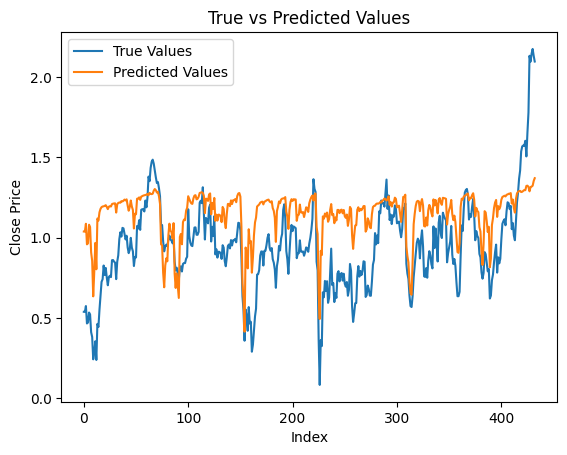

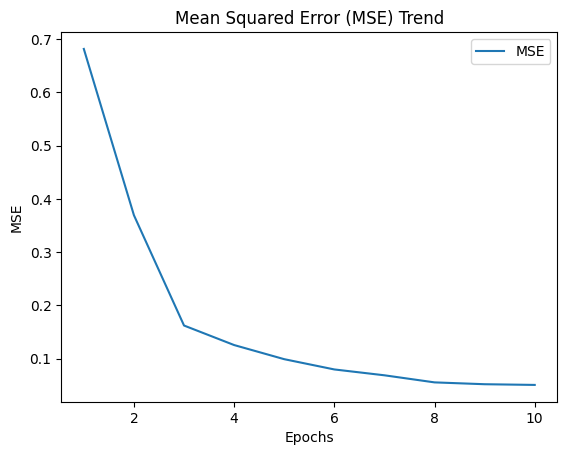

In [ ]:
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]

# Prepare input features (X_train and X_test)
X_train = ibm_df_train_set[['Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS']].values
X_test = ibm_df_test_set[['Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS']].values

# Prepare target values (y_train and y_test)
y_train = np.array(ibm_df_train_set[['Close']])
y_test = np.array(ibm_df_test_set[['Close']])

# Normalize the data if necessary

# Reshape input features for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

X_train = np.repeat(X_train, repeats=30, axis=1) #this is key
X_test = np.repeat(X_test, repeats=30, axis=1)



# Define and compile the model
model = keras.Sequential([
    keras.layers.LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1)
])
model.compile(optimizer='adam', loss='mse')

# Fit the model
history = model.fit(x=X_train, y=y_train, batch_size=40, epochs=10, validation_data=(X_test, y_test))

# Predict the values
y_pred = model.predict(X_test)

# Plot the predicted values
plt.plot(y_test, label='True Values')
plt.plot(np.reshape(y_pred, y_pred.shape[0]),  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Extract the MSE values from the history object
mse_values = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='MSE')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/10
99/99 [==============================] - 9s 23ms/step - loss: 0.3425 - val_loss: 0.1004
Epoch 2/10
99/99 [==============================] - 2s 18ms/step - loss: 0.1326 - val_loss: 0.0915
Epoch 3/10
99/99 [==============================] - 2s 18ms/step - loss: 0.0835 - val_loss: 0.0748
Epoch 4/10
99/99 [==============================] - 2s 17ms/step - loss: 0.0583 - val_loss: 0.0756
Epoch 5/10
99/99 [==============================] - 2s 19ms/step - loss: 0.0495 - val_loss: 0.0973
Epoch 6/10
99/99 [==============================] - 2s 25ms/step - loss: 0.0436 - val_loss: 0.0593
Epoch 7/10
99/99 [==============================] - 2s 18ms/step - loss: 0.0357 - val_loss: 0.0618
Epoch 8/10
99/99 [==============================] - 2s 17ms/step - loss: 0.0300 - val_loss: 0.0405
Epoch 9/10
99/99 [==============================] - 2s 17ms/step - loss: 0.0288 - val_loss: 0.0612
Epoch 10/10
14/14 [==============================] - 1s 6ms/step


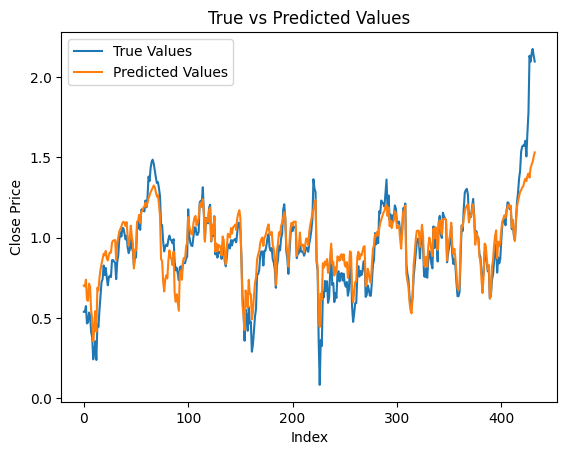

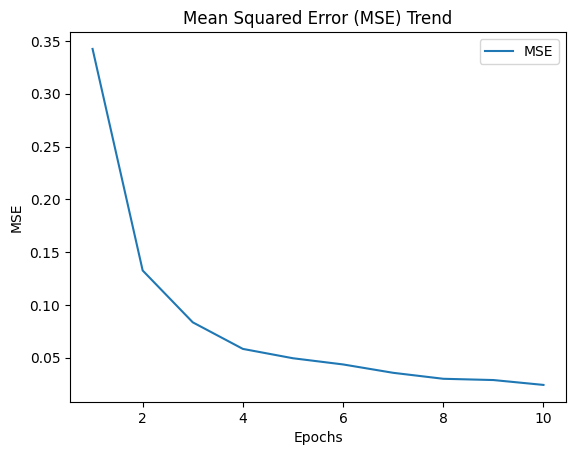

In [ ]:
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:] ####iloc
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
#y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
#y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train) #Torre: X_train.values lo converte

X_test = np.array(X_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1])) #X_train è una matrice. Verificare che i valori siano messi al posto giusto
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

X_train = np.repeat(X_train, repeats=30, axis=1)
y_train = np.array(ibm_df_train_set[['Close']])

X_test = np.repeat(X_test, repeats=30, axis=1)
y_test = np.array(ibm_df_test_set[['Close']])

model = keras.Sequential()
model.add(keras.layers.LSTM(units = 50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(units=1))
model.compile(optimizer ='adam', loss='mse')


history = model.fit(x=X_train, y=y_train, batch_size=10, epochs=10, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)



# Plot the predicted values
plt.plot(y_test, label='True Values')
plt.plot(np.reshape(y_pred, y_pred.shape[0]),  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Extract the MSE values from the history object
mse_values = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='MSE')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
#another try: do not use my customized windowed

ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

model = keras.Sequential()
model.add(keras.Input((1,5)))
model.add(keras.layers.LSTM(1)) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')

model.fit(x=X_train, y=y_train, batch_size=4, epochs=30, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
247/247 [==============================] - 6s 13ms/step - loss: 0.7266 - val_loss: 0.9676
Epoch 2/30
247/247 [==============================] - 2s 7ms/step - loss: 0.7265 - val_loss: 0.9674
Epoch 3/30
247/247 [==============================] - 1s 4ms/step - loss: 0.7265 - val_loss: 0.9674
Epoch 4/30
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9674
Epoch 5/30
247/247 [==============================] - 1s 5ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 6/30
247/247 [==============================] - 1s 5ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 7/30
247/247 [==============================] - 1s 5ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 8/30
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 9/30
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 10/30
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.967

Epoch 1/30
247/247 [==============================] - 2s 7ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 2/30
247/247 [==============================] - 2s 8ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 3/30
247/247 [==============================] - 2s 6ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 4/30
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9674
Epoch 5/30
247/247 [==============================] - 1s 4ms/step - loss: 0.6007 - val_loss: 1.0332
Epoch 6/30
247/247 [==============================] - 1s 4ms/step - loss: 0.4174 - val_loss: 0.9904
Epoch 7/30
247/247 [==============================] - 1s 4ms/step - loss: 0.4038 - val_loss: 0.9829
Epoch 8/30
247/247 [==============================] - 2s 6ms/step - loss: 0.3980 - val_loss: 0.9792
Epoch 9/30
247/247 [==============================] - 1s 6ms/step - loss: 0.3946 - val_loss: 0.9736
Epoch 10/30
247/247 [==============================] - 1s 4ms/step - loss: 0.3925 - val_loss: 0.9727

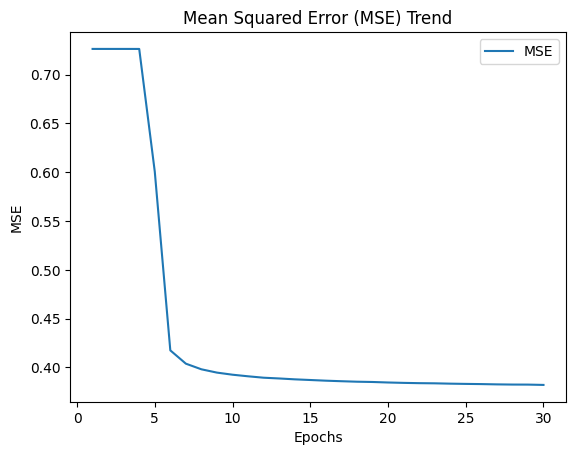

In [ ]:
history = model.fit(x=X_train, y=y_train, batch_size=4, epochs=30, validation_data= (X_test,y_test))
# Extract the MSE values from the history object
mse_values = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='MSE')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/50
247/247 [==============================] - 4s 8ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 2/50
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 3/50
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 4/50
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 5/50
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 6/50
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 7/50
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 8/50
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 9/50
247/247 [==============================] - 1s 4ms/step - loss: 0.7264 - val_loss: 0.9673
Epoch 10/50
247/247 [==============================] - 1s 5ms/step - loss: 0.7264 - val_loss: 0.9673

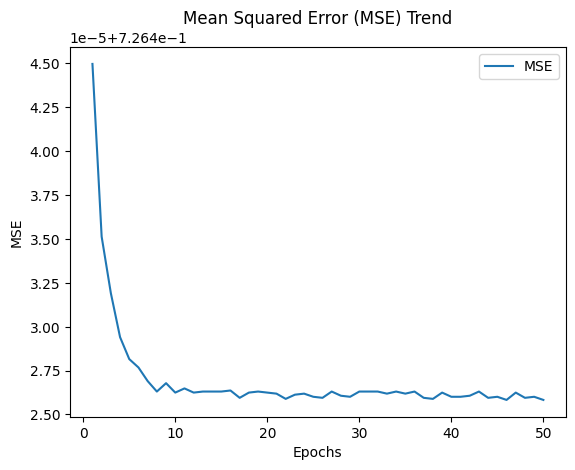

In [ ]:
#prova definitiva per scegliere il numero di epoche!!

ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

model = keras.Sequential()
model.add(keras.Input((1,5)))
model.add(keras.layers.LSTM(1)) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')


history = model.fit(x=X_train, y=y_train, batch_size=4, epochs=50, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)



# Extract the MSE values from the history object
mse_values = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='MSE')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

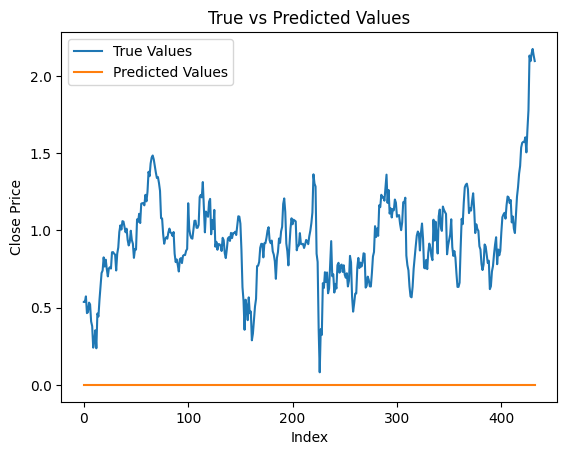

In [ ]:

# Plot the predicted values
plt.plot(y_test, label='True Values')
plt.plot(np.reshape(y_pred, 433),  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Reference to implement to LSTM model:https://medium.com/@pennQuin/implementation-of-long-short-term-memory-lstm-81e35fa5ca54

Epoch 1/10
99/99 [==============================] - 13s 60ms/step - loss: 0.4050 - val_loss: 0.1939
Epoch 2/10
99/99 [==============================] - 4s 37ms/step - loss: 0.0920 - val_loss: 0.0946
Epoch 3/10
99/99 [==============================] - 3s 35ms/step - loss: 0.0627 - val_loss: 0.1044
Epoch 4/10
99/99 [==============================] - 4s 44ms/step - loss: 0.0443 - val_loss: 0.0474
Epoch 5/10
99/99 [==============================] - 4s 43ms/step - loss: 0.0320 - val_loss: 0.0527
Epoch 6/10
99/99 [==============================] - 5s 54ms/step - loss: 0.0251 - val_loss: 0.0472
Epoch 7/10
99/99 [==============================] - 4s 41ms/step - loss: 0.0221 - val_loss: 0.0398
Epoch 8/10
99/99 [==============================] - 4s 38ms/step - loss: 0.0163 - val_loss: 0.0228
Epoch 9/10
99/99 [==============================] - 3s 34ms/step - loss: 0.0132 - val_loss: 0.0200
Epoch 10/10
14/14 [==============================] - 1s 12ms/step


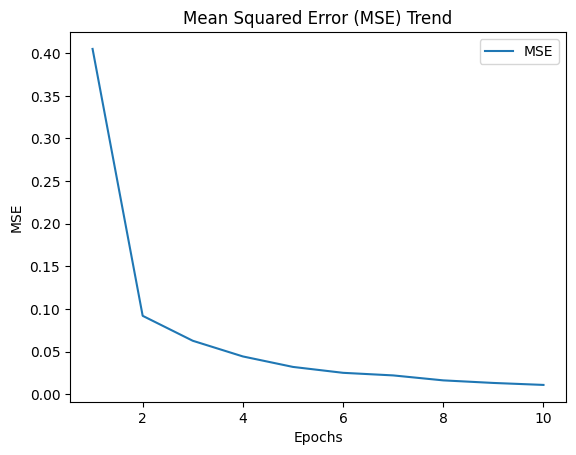

In [ ]:
#prova con diversa struttura layers
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(ibm_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(ibm_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=10, validation_data= (X_test_1,y_test_1))
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

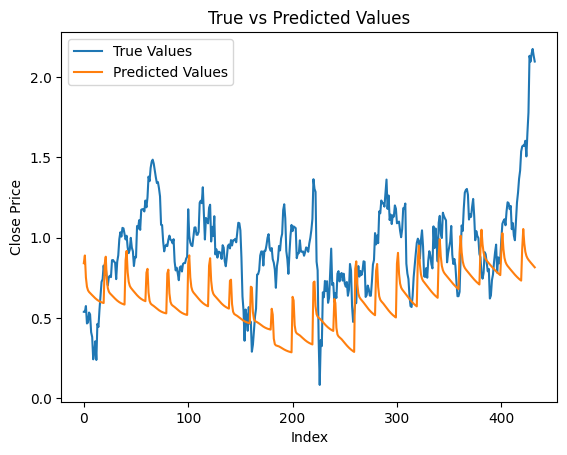

In [ ]:
# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,8660)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#another try: do not use my customized windowed

ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)
ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = ibm_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = ibm_df_train_set[['Close']]
X_test = ibm_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = ibm_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

model = keras.Sequential()
model.add(keras.Input((1,5)))
model.add(keras.layers.LSTM(1)) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')

model.fit(x=X_train, y=y_train, batch_size=200, epochs=300, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

In [ ]:
model.history

In [ ]:
#PROVE

#versione liste
def windowed_dataset(dataset, window_size):
    windowed_dataset = dataset.set_index('Date').copy()

    windowed_close = np.full((len(windowed_dataset), window_size), np.nan)
    windowed_volume = np.full((len(windowed_dataset), window_size), np.nan)

    for j in range(len(windowed_dataset)):
        if j >= window_size:
            window_data = windowed_dataset.iloc[j - window_size : j]
            windowed_close[j] = window_data['Close'].values
            windowed_volume[j] = window_data['Volume'].values

    windowed_dataset['Memory_Close'] = list(windowed_close)
    windowed_dataset['Memory_Volume'] = list(windowed_volume)

    return windowed_dataset


ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)

X = windowed_dataset(ibm_df_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_set)-5)
y = windowed_dataset(ibm_df_set, 5)[['Close']].tail(len(ibm_df_set)-5)

X.shape,y.shape

X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0],1, X.shape[1]))
y = np.reshape(y, (y.shape[0],1,y.shape[1]))

model = keras.Sequential()
model.add(keras.Input((1,6)))
model.add(keras.layers.LSTM(1, input_shape=(1,6))) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')

model.fit(x=X, y=y, batch_size=100, epochs=10)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
X.shape,y.shape

((1412, 1, 6), (1412, 1))

In [ ]:
#PROVE

#versione liste
def windowed_dataset(dataset, window_size):
    windowed_dataset = dataset.set_index('Date').copy()

    windowed_close = np.full((len(windowed_dataset), window_size), np.nan)
    windowed_volume = np.full((len(windowed_dataset), window_size), np.nan)

    for j in range(len(windowed_dataset)):
        if j >= window_size:
            window_data = windowed_dataset.iloc[j - window_size : j]
            windowed_close[j] = window_data['Close'].values
            windowed_volume[j] = window_data['Volume'].values

    windowed_dataset['Memory_Close'] = list(windowed_close)
    windowed_dataset['Memory_Volume'] = list(windowed_volume)

    return windowed_dataset


ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)

X = windowed_dataset(ibm_df_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_train_set)-5)
y = windowed_dataset(ibm_df_set, 5)[['Close']].tail(len(ibm_df_train_set)-5)

ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]

X_train = windowed_dataset(ibm_df_train_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_train_set)-5)
y_train = windowed_dataset(ibm_df_train_set, 5)[['Close']].tail(len(ibm_df_train_set)-5)
X_test = windowed_dataset(ibm_df_test_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_test_set)-5)
y_test = windowed_dataset(ibm_df_test_set, 5)[['Close']].tail(len(ibm_df_test_set)-5)


#X_train = np.concatenate((tf.convert_to_tensor(X_train[['EMAF','RSI','EMAM','EMAS']], dtype='float64'), np.asarray(X_train[['Memory_Close']]), np.asarray(X_train[['Memory_Close']])), axis=1)
#X_test = np.concatenate((tf.convert_to_tensor(X_test[['EMAF','RSI','EMAM','EMAS']], dtype='float64'), np.asarray(X_test[['Memory_Close']]), np.asarray(X_test[['Memory_Close']])), axis=1)

y_train, y_test = np.array(y_train), np.array(y_test)

X_train = np.reshape(X_train, (245, 4, X_train.shape[1]))
X_test = np.reshape(X_test, (107,4, X_test.shape[1]))
y_train = np.reshape(y_train, (245, 1))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

#IBM
model = Sequential()
model.add(keras.Input((4,6)))
model.add(keras.layers.LSTM(1, input_shape=(4,6))) #1 è l'output dimension
model.compile(optimizer ='adam', loss='mse')

model.fit(x=X_train, y=y_train, batch_size=32, epochs=10)



y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('IBM')
plt.show()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
#Indicators to be considered in the training set
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)

ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]

X_train = windowed_dataset(ibm_df_train_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_train_set)-5)
y_train = windowed_dataset(ibm_df_train_set, 5)[['Close']].tail(len(ibm_df_train_set)-5)
X_test = windowed_dataset(ibm_df_test_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_test_set)-5)
y_test = windowed_dataset(ibm_df_test_set, 5)[['Close']].tail(len(ibm_df_test_set)-5)


X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

#IBM
lstm_input = keras.layers.Input(shape=((6,1)), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train,  batch_size=15,epochs=30,validation_split=0.1)


y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('IBM')
plt.show()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
#IBM
def windowed_dataset(dataset, window_size):
    windowed_dataset = dataset.set_index('Date').copy()

    windowed_close = []
    windowed_volume = []

    for j in range(len(windowed_dataset)):
        if j >= window_size:
            window_data = windowed_dataset.iloc[j - window_size : j]
            windowed_close.append(window_data['Close'].values)
            windowed_volume.append(window_data['Volume'].values)
        else:
            windowed_close.append(np.full(window_size, np.nan))
            windowed_volume.append(np.full(window_size, np.nan))

    windowed_dataset['Memory_Close'] = windowed_close
    windowed_dataset['Memory_Volume'] = windowed_volume

    return windowed_dataset


#Indicators to be considered in the training set
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df_set = ibm_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(ibm_df_set) * 0.8)

ibm_df_train_set = ibm_df_set.loc[:splitlimit,:]
ibm_df_test_set = ibm_df_set.loc[splitlimit:,:]

X_train = np.array(windowed_dataset(ibm_df_train_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_train_set)-5))
y_train = np.array(windowed_dataset(ibm_df_train_set, 5)[['Close']].tail(len(ibm_df_train_set)-5))
X_test = np.array(windowed_dataset(ibm_df_test_set, 5)[['RSI', 'EMAF', 'EMAM','EMAS','Memory_Close', 'Memory_Volume']].tail(len(ibm_df_test_set)-5))
y_test = np.array(windowed_dataset(ibm_df_test_set, 5)[['Close']].tail(len(ibm_df_test_set)-5))



X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

# Define the model
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(6,1)),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, validation_split=0.1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
splitlimit = int(len(X) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test= [],[]
for feature in y:
    y_train.append(feature[:splitlimit])
    y_test.append(feature[splitlimit:])

y_train, y_test = np.array(y_train), np.array(y_test)

In [ ]:
X_train.dtype
splitlimit = int(len(X) * 0.8)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]

np.random.seed(10)

# Reshape X_train and X_test to match the expected input shape of the LSTM layer

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1))

dtype('O')

49/49 [==============================] - 1s 18ms/step


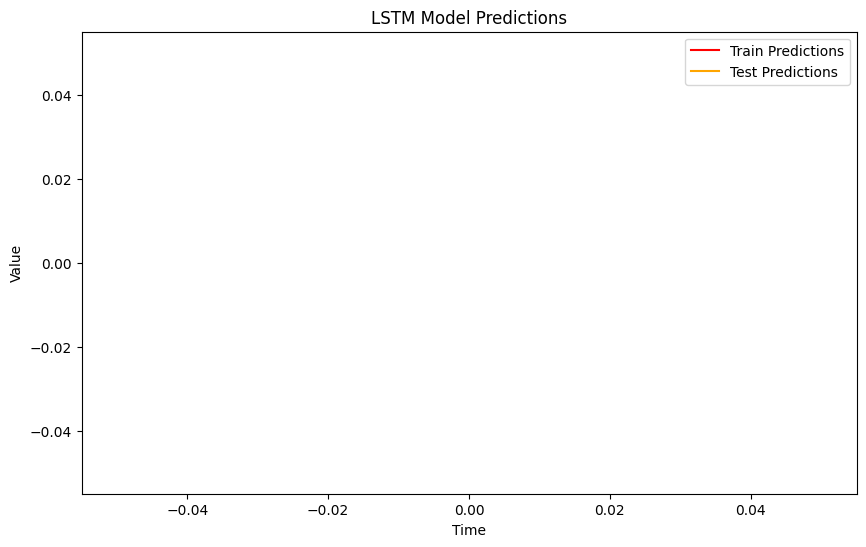

In [ ]:
import matplotlib.pyplot as plt

# Funzione per fare predizioni utilizzando il modello
def make_predictions(model, dataset):
    predictions = model.predict(dataset)
    return predictions

# Fare predizioni sui dati di addestramento e di test
train_predictions = make_predictions(lstm_model, X)
test_predictions = make_predictions(lstm_model, X)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train_predictions, label='Train Predictions', color='red')
plt.plot(test_predictions, label='Test Predictions', color='orange')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import math
#I have to fix the fact that the shape of y_test is 292 while the shape of y_pred is 282
mse = mean_squared_error(y_test[:282], y_pred)
rmse = math.sqrt(mse)

print("RMSE:", rmse)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
      a = dataset.iloc[i:(i+look_back), :]
      dataX.append(a)
      dataY.append(dataset.iloc[i + look_back, :])
  return np.array(dataX), np.array(dataY)

ibm_df['RSI']=ta.rsi(ibm_df.Close, length=10)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)


dataset = ibm_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.loc[0:train_size,:], dataset.loc[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
 model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
 model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: cannot reshape array of size 111780 into shape (1242,10,1)

Epoch 1/10
99/99 [==============================] - 33s 123ms/step - loss: 0.0205 - val_loss: 4.2795
Epoch 2/10
99/99 [==============================] - 7s 74ms/step - loss: 0.0096 - val_loss: 4.3836
Epoch 3/10
99/99 [==============================] - 6s 64ms/step - loss: 0.0081 - val_loss: 4.2317
Epoch 4/10
99/99 [==============================] - 7s 70ms/step - loss: 0.0074 - val_loss: 4.3061
Epoch 5/10
99/99 [==============================] - 5s 55ms/step - loss: 0.0071 - val_loss: 4.1097
Epoch 6/10
99/99 [==============================] - 5s 48ms/step - loss: 0.0066 - val_loss: 3.9007
Epoch 7/10
99/99 [==============================] - 6s 57ms/step - loss: 0.0047 - val_loss: 3.5457
Epoch 8/10
99/99 [==============================] - 5s 55ms/step - loss: 0.0029 - val_loss: 3.4169
Epoch 9/10
99/99 [==============================] - 5s 55ms/step - loss: 0.0025 - val_loss: 3.3540
Epoch 10/10
14/14 [==============================] - 2s 15ms/step


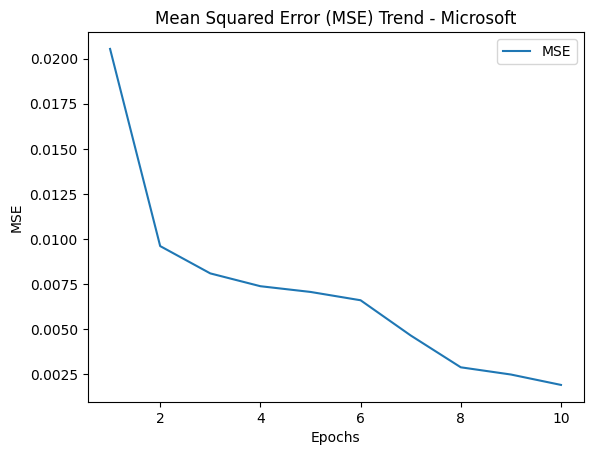

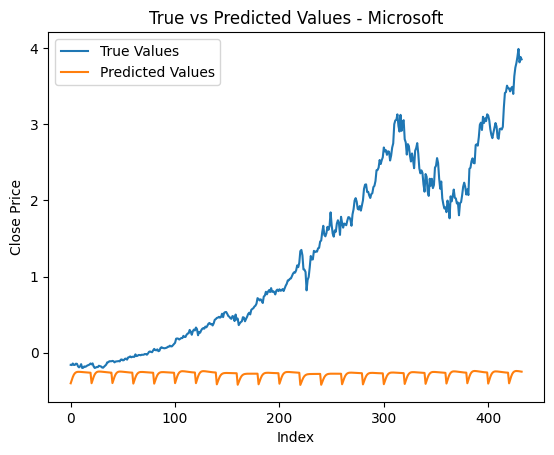

In [ ]:
##MICROSOFT BUT RIGHT!

#prova con diversa struttura layers
microsoft_df['RSI']=ta.rsi(microsoft_df.Close, length=10)
microsoft_df['EMAF']=ta.ema(microsoft_df.Close, length=20)
microsoft_df['EMAM']=ta.ema(microsoft_df.Close, length=100)
microsoft_df['EMAS']=ta.ema(microsoft_df.Close, length=150)

microsoft_df_set = microsoft_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(microsoft_df_set) * 0.8)
microsoft_df_train_set = microsoft_df_set.loc[:splitlimit,:]
microsoft_df_test_set = microsoft_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = microsoft_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = microsoft_df_train_set[['Close']]
X_test = microsoft_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = microsoft_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(microsoft_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(microsoft_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=10, validation_data= (X_test_1,y_test_1)) #ho provato con 30 ma è meglio 10
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend - Microsoft')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,8660)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values - Microsoft')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

(1417, 9)
<class 'pandas.core.frame.DataFrame'>
Epoch 1/30
68/68 [==============================] - 3s 14ms/step - loss: 0.0650 - val_loss: 0.2904
Epoch 2/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.2774
Epoch 3/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.2904
Epoch 4/30
68/68 [==============================] - 1s 7ms/step - loss: 0.0081 - val_loss: 0.2625
Epoch 5/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.2929
Epoch 6/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.2625
Epoch 7/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0084 - val_loss: 0.3289
Epoch 8/30
68/68 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.3027
Epoch 9/30
68/68 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 0.2828
Epoch 10/30
68/68 [==============================] - 0s 7ms/step - lo

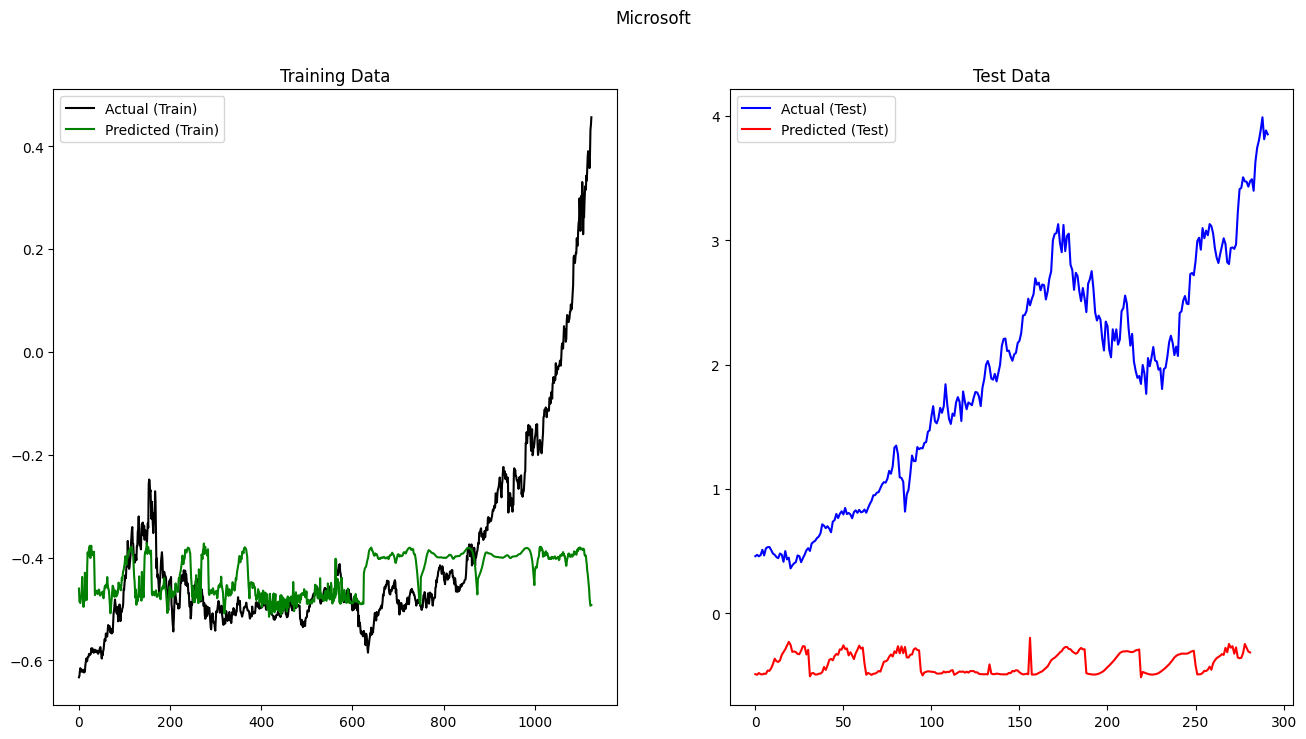

In [ ]:
#Microsoft

# Adding indicators
microsoft_df['RSI']=ta.rsi(microsoft_df.Close, length=15)
microsoft_df['EMAF']=ta.ema(microsoft_df.Close, length=20)
microsoft_df['EMAM']=ta.ema(microsoft_df.Close, length=100)
microsoft_df['EMAS']=ta.ema(microsoft_df.Close, length=150)


microsoft_df.dropna(inplace=True)
microsoft_df.reset_index(inplace = True)
microsoft_df_set = microsoft_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

microsoft_df_set.head(10)
print(microsoft_df_set.shape)
print(type(microsoft_df_set))
#Target column Categories
Y =[1 if microsoft_df.Open[i]<microsoft_df.Close[i] else 0 for i in range(0, len(microsoft_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [microsoft_df.Close[i] for i in range(0, len(microsoft_df))] #on y, I have the close price

#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, microsoft_df_set.shape[0]):
        X[j].append(microsoft_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('Microsoft')
plt.show()

Epoch 1/30
86/86 [==============================] - 17s 86ms/step - loss: 0.0536 - val_loss: 4.3246
Epoch 2/30
86/86 [==============================] - 4s 50ms/step - loss: 0.0311 - val_loss: 3.8324
Epoch 3/30
86/86 [==============================] - 4s 47ms/step - loss: 0.0209 - val_loss: 3.3869
Epoch 4/30
86/86 [==============================] - 5s 60ms/step - loss: 0.0091 - val_loss: 2.9231
Epoch 5/30
86/86 [==============================] - 5s 57ms/step - loss: 0.0069 - val_loss: 2.5103
Epoch 6/30
86/86 [==============================] - 4s 50ms/step - loss: 0.0051 - val_loss: 2.3111
Epoch 7/30
86/86 [==============================] - 4s 44ms/step - loss: 0.0046 - val_loss: 2.2124
Epoch 8/30
86/86 [==============================] - 3s 30ms/step - loss: 0.0037 - val_loss: 1.9808
Epoch 9/30
86/86 [==============================] - 3s 30ms/step - loss: 0.0033 - val_loss: 2.0119
Epoch 10/30
86/86 [==============================] - 3s 30ms/step - loss: 0.0028 - val_loss: 1.7655
Epoch 11

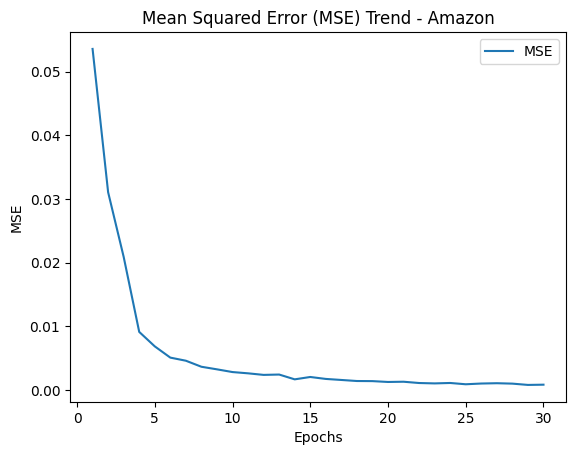

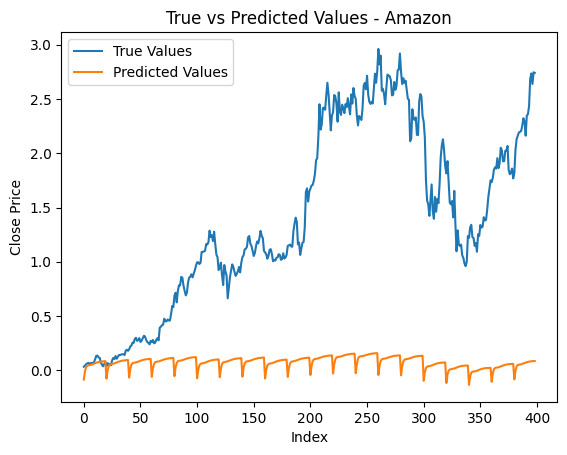

In [ ]:
##AMAZON BUT RIGHT!

#prova con diversa struttura layers
amazon_df['RSI']=ta.rsi(amazon_df.Close, length=10)
amazon_df['EMAF']=ta.ema(amazon_df.Close, length=20)
amazon_df['EMAM']=ta.ema(amazon_df.Close, length=100)
amazon_df['EMAS']=ta.ema(amazon_df.Close, length=150)

amazon_df_set = amazon_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(amazon_df_set) * 0.8)
amazon_df_train_set = amazon_df_set.loc[:splitlimit,:]
amazon_df_test_set = amazon_df_set.loc[splitlimit:,:]
#ibm_df_train_set.set_index('Date')
#ibm_df_test_set.set_index('Date')

X_train = amazon_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = amazon_df_train_set[['Close']]
X_test = amazon_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = amazon_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(amazon_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(amazon_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=30, validation_data= (X_test_1,y_test_1))
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend - Amazon')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,7980)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values - Amazon')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#amazon

# Adding indicators
amazon_df['RSI']=ta.rsi(amazon_df.Close, length=15)
amazon_df['EMAF']=ta.ema(amazon_df.Close, length=20)
amazon_df['EMAM']=ta.ema(amazon_df.Close, length=100)
amazon_df['EMAS']=ta.ema(amazon_df.Close, length=150)


amazon_df.dropna(inplace=True)
amazon_df.reset_index(inplace = True)
amazon_df_set = amazon_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

amazon_df_set.head(10)
print(amazon_df_set.shape)
print(type(amazon_df_set))
#Target column Categories
Y = [1 if amazon_df.Open[i]<amazon_df.Close[i] else 0 for i in range(0, len(amazon_df))]

y = [amazon_df.Close[i] for i in range(0, len(amazon_df))] #on yi, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, amazon_df_set.shape[0]):
        X[j].append(amazon_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('Amazon')
plt.show()

Epoch 1/30
99/99 [==============================] - 22s 92ms/step - loss: 0.0926 - val_loss: 2.3224
Epoch 2/30
99/99 [==============================] - 6s 62ms/step - loss: 0.0351 - val_loss: 1.5345
Epoch 3/30
99/99 [==============================] - 7s 73ms/step - loss: 0.0185 - val_loss: 1.7092
Epoch 4/30
99/99 [==============================] - 8s 79ms/step - loss: 0.0100 - val_loss: 1.6441
Epoch 5/30
99/99 [==============================] - 9s 87ms/step - loss: 0.0065 - val_loss: 1.7044
Epoch 6/30
99/99 [==============================] - 7s 72ms/step - loss: 0.0053 - val_loss: 1.5721
Epoch 7/30
99/99 [==============================] - 8s 81ms/step - loss: 0.0045 - val_loss: 1.5665
Epoch 8/30
99/99 [==============================] - 7s 74ms/step - loss: 0.0036 - val_loss: 1.6810
Epoch 9/30
99/99 [==============================] - 7s 72ms/step - loss: 0.0038 - val_loss: 1.6492
Epoch 10/30
99/99 [==============================] - 8s 84ms/step - loss: 0.0031 - val_loss: 1.5939
Epoch 11

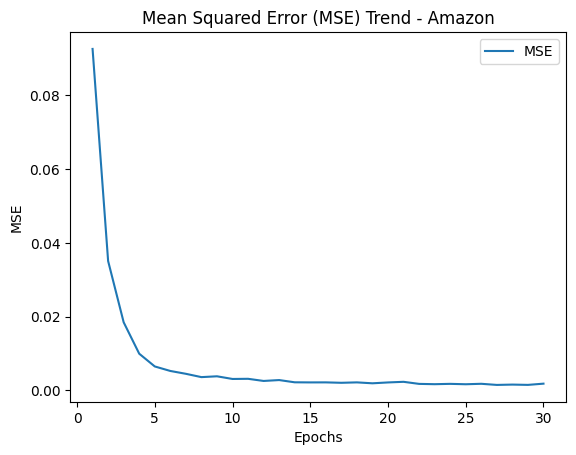

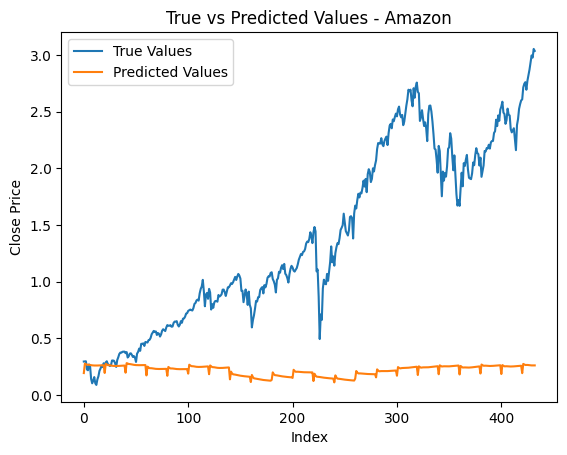

In [ ]:
##sp500 BUT RIGHT!

#prova con diversa struttura layers
sp500_df['RSI']=ta.rsi(sp500_df.Close, length=10)
sp500_df['EMAF']=ta.ema(sp500_df.Close, length=20)
sp500_df['EMAM']=ta.ema(sp500_df.Close, length=100)
sp500_df['EMAS']=ta.ema(sp500_df.Close, length=150)

sp500_df_set = sp500_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(sp500_df_set) * 0.8)
sp500_df_train_set = sp500_df_set.loc[:splitlimit,:]
sp500_df_test_set = sp500_df_set.loc[splitlimit:,:]


X_train = sp500_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = sp500_df_train_set[['Close']]
X_test = sp500_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = sp500_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(sp500_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(sp500_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=30, validation_data= (X_test_1,y_test_1))
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend - sp500')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,8660)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values - sp500')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#sp500

# Adding indicators
sp500_df['RSI']=ta.rsi(sp500_df.Close, length=15)
sp500_df['EMAF']=ta.ema(sp500_df.Close, length=20)
sp500_df['EMAM']=ta.ema(sp500_df.Close, length=100)
sp500_df['EMAS']=ta.ema(sp500_df.Close, length=150)


sp500_df.dropna(inplace=True)
sp500_df.reset_index(inplace = True)
sp500_df_set = ibm_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

sp500_df_set.head(10)
print(sp500_df_set.shape)
print(type(sp500_df_set))
#Target column Categories
Y =[1 if sp500_df.Open[i]<sp500_df.Close[i] else 0 for i in range(0, len(sp500_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [sp500_df.Close[i] for i in range(0, len(sp500_df))] #on y, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, sp500_df_set.shape[0]):
        X[j].append(sp500_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('sp500')
plt.show()

Epoch 1/10
99/99 [==============================] - 19s 91ms/step - loss: 0.2510 - val_loss: 0.4538
Epoch 2/10
99/99 [==============================] - 6s 59ms/step - loss: 0.0947 - val_loss: 0.2213
Epoch 3/10
99/99 [==============================] - 8s 78ms/step - loss: 0.0575 - val_loss: 0.1188
Epoch 4/10
99/99 [==============================] - 5s 54ms/step - loss: 0.0376 - val_loss: 0.1162
Epoch 5/10
99/99 [==============================] - 6s 58ms/step - loss: 0.0286 - val_loss: 0.1119
Epoch 6/10
99/99 [==============================] - 5s 51ms/step - loss: 0.0249 - val_loss: 0.1107
Epoch 7/10
99/99 [==============================] - 5s 48ms/step - loss: 0.0175 - val_loss: 0.0797
Epoch 8/10
99/99 [==============================] - 6s 63ms/step - loss: 0.0148 - val_loss: 0.1027
Epoch 9/10
99/99 [==============================] - 6s 56ms/step - loss: 0.0145 - val_loss: 0.1187
Epoch 10/10
14/14 [==============================] - 1s 10ms/step


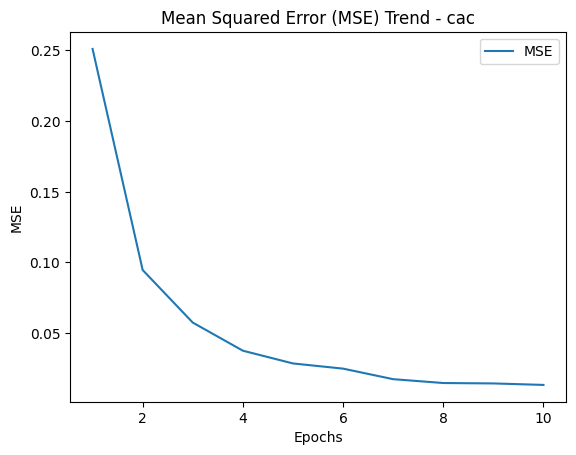

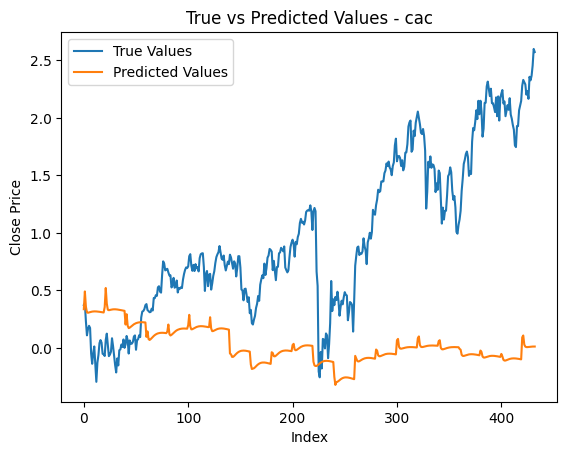

In [ ]:
##cac BUT RIGHT!

#prova con diversa struttura layers
cac_df['RSI']=ta.rsi(cac_df.Close, length=10)
cac_df['EMAF']=ta.ema(cac_df.Close, length=20)
cac_df['EMAM']=ta.ema(cac_df.Close, length=100)
cac_df['EMAS']=ta.ema(cac_df.Close, length=150)

cac_df_set = cac_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(sp500_df_set) * 0.8)
cac_df_train_set = cac_df_set.loc[:splitlimit,:]
cac_df_test_set = cac_df_set.loc[splitlimit:,:]


X_train = cac_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = cac_df_train_set[['Close']]
X_test = cac_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = cac_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(cac_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(cac_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=10, validation_data= (X_test_1,y_test_1))
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend - cac')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,8660)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values - cac')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#cac

# Adding indicators
cac_df['RSI']=ta.rsi(cac_df.Close, length=15)
cac_df['EMAF']=ta.ema(cac_df.Close, length=20)
cac_df['EMAM']=ta.ema(cac_df.Close, length=100)
cac_df['EMAS']=ta.ema(cac_df.Close, length=150)


cac_df.dropna(inplace=True)
cac_df.reset_index(inplace = True)
cac_df_set = cac_df.loc[:, [ 'Open', 'High', 'Low', 'Volume', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

cac_df_set.head(10)
print(cac_df_set.shape)
print(type(cac_df_set))
#Target column Categories
Y =[1 if cac_df.Open[i]<cac_df.Close[i] else 0 for i in range(0, len(cac_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [cac_df.Close[i] for i in range(0, len(cac_df))] #on y, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, cac_df_set.shape[0]):
        X[j].append(cac_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('Cac')
plt.show()

Epoch 1/10
99/99 [==============================] - 19s 82ms/step - loss: 0.3498 - val_loss: 0.3529
Epoch 2/10
99/99 [==============================] - 7s 66ms/step - loss: 0.1102 - val_loss: 0.1852
Epoch 3/10
99/99 [==============================] - 6s 58ms/step - loss: 0.0563 - val_loss: 0.1303
Epoch 4/10
99/99 [==============================] - 8s 81ms/step - loss: 0.0407 - val_loss: 0.1021
Epoch 5/10
99/99 [==============================] - 5s 51ms/step - loss: 0.0272 - val_loss: 0.0697
Epoch 6/10
99/99 [==============================] - 8s 81ms/step - loss: 0.0235 - val_loss: 0.0714
Epoch 7/10
99/99 [==============================] - 5s 54ms/step - loss: 0.0193 - val_loss: 0.0740
Epoch 8/10
99/99 [==============================] - 6s 56ms/step - loss: 0.0169 - val_loss: 0.0525
Epoch 9/10
99/99 [==============================] - 5s 55ms/step - loss: 0.0135 - val_loss: 0.0648
Epoch 10/10
14/14 [==============================] - 2s 16ms/step


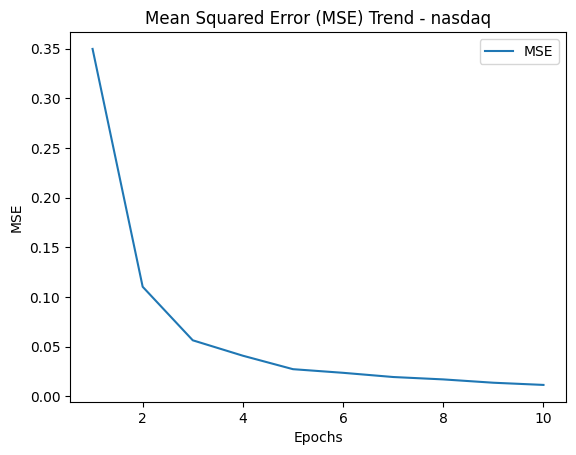

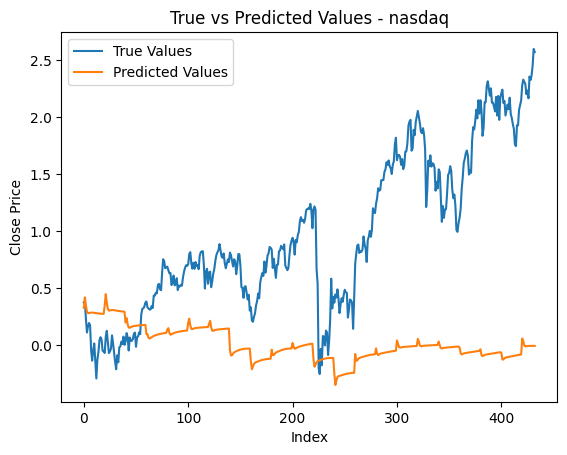

In [ ]:
##nasdaq BUT RIGHT!

#prova con diversa struttura layers
nasdaq_df['RSI']=ta.rsi(nasdaq_df.Close, length=10)
nasdaq_df['EMAF']=ta.ema(nasdaq_df.Close, length=20)
nasdaq_df['EMAM']=ta.ema(nasdaq_df.Close, length=100)
nasdaq_df['EMAS']=ta.ema(nasdaq_df.Close, length=150)

nasdaq_df_set = cac_df.loc[:, ['Date','Volume','Close','RSI', 'EMAF', 'EMAM','EMAS']].dropna()

splitlimit = int(len(nasdaq_df_set) * 0.8)
nasdaq_df_train_set = nasdaq_df_set.loc[:splitlimit,:]
nasdaq_df_test_set = nasdaq_df_set.loc[splitlimit:,:]


X_train = nasdaq_df_train_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_train = nasdaq_df_train_set[['Close']]
X_test = nasdaq_df_test_set[['Volume','RSI', 'EMAF', 'EMAM','EMAS']]
y_test = nasdaq_df_test_set[['Close']]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
#y_train = np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
#y_test = np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

X_train_1 = np.repeat(X_train, repeats=20, axis=1)
y_train_1 = np.array(nasdaq_df_train_set[['Close']])

X_test_1 = np.repeat(X_test, repeats=20, axis=1)
y_test_1 = np.array(nasdaq_df_test_set[['Close']])

model_1 = keras.Sequential()
model_1.add(keras.layers.LSTM(units = 50, return_sequences=True, input_shape=(X_train_1.shape[1], X_train_1.shape[2])))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.LSTM(units = 50,return_sequences=True))
model_1.add(keras.layers.Dense(units=1))
model_1.compile(optimizer ='adam', loss='mse')


history = model_1.fit(x=X_train_1, y=y_train_1, batch_size=10, epochs=10, validation_data= (X_test_1,y_test_1))
y_pred = model_1.predict(X_test_1)

# Extract the MSE values from the history object
mse_values_1 = history.history['loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values_1) + 1), mse_values_1, label='MSE')
plt.title('Mean Squared Error (MSE) Trend - nasdaq')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


# Plot the predicted values
plt.plot(y_test_1, label='True Values')
plt.plot(np.reshape(y_pred,8660)[:len(y_test_1)],  label='Predicted Values')

plt.title('True vs Predicted Values - nasdaq')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
#nasdaq

# Adding indicators
nasdaq_df['RSI']=ta.rsi(nasdaq_df.Close, length=15)
nasdaq_df['EMAF']=ta.ema(nasdaq_df.Close, length=20)
nasdaq_df['EMAM']=ta.ema(nasdaq_df.Close, length=100)
nasdaq_df['EMAS']=ta.ema(nasdaq_df.Close, length=150)


nasdaq_df.dropna(inplace=True)
nasdaq_df.reset_index(inplace = True)
nasdaq_df_set = nasdaq_df.loc[:, [ 'Open', 'High', 'Low', 'Volume','Close', 'RSI', 'EMAF', 'EMAM','EMAS', 'Close']]
pd.set_option('display.max_columns', None)

nasdaq_df_set.head(10)
print(nasdaq_df_set.shape)
print(type(nasdaq_df_set))
#Target column Categories
Y =[1 if nasdaq_df.Open[i]<nasdaq_df.Close[i] else 0 for i in range(0, len(nasdaq_df))] #on Y,  I have 1 if the open price is lower than the close price, 0 otherwise

y = [nasdaq_df.Close[i] for i in range(0, len(nasdaq_df))] #on y, I have the close price
#print(yi)
#print(len(yi))
#On X, I'm storing the values of the 9 features I have but considering a shift of 10 weeks
X = []
backcandles = 10
for j in range(9):
    X.append([])
    for i in range(backcandles, nasdaq_df_set.shape[0]):
        X[j].append(nasdaq_df_set.iloc[i - backcandles:i, j].values)

splitlimit = int(len(X[0]) * 0.8)
X_train, X_test = [], []
for feature in X:
    X_train.append(feature[:splitlimit])
    X_test.append(feature[splitlimit:])

X_train, X_test = np.array(X_train), np.array(X_test)

y_train, y_test = y[:splitlimit], y[splitlimit:]
y_train, y_test = np.array(y_train), np.array(y_test)

# Reshaping the arrays to match the input shape expected by the model
X_train = X_train.reshape(-1, backcandles, 9)
X_test = X_test.reshape(-1, backcandles, 9)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 9), name='lstm_input')
inputs = keras.layers.LSTM(50, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for training data
axes[0].plot(y_train, color='black', label='Actual (Train)')
axes[0].plot(y_pred_train, color='green', label='Predicted (Train)')
axes[0].set_title('Training Data')
axes[0].legend()

# Plot for test data
axes[1].plot(y_test, color='blue', label='Actual (Test)')
axes[1].plot(y_pred, color='red', label='Predicted (Test)')
axes[1].set_title('Test Data')
axes[1].legend()

plt.suptitle('nasdaq')
plt.show()

In [ ]:
##modello decisionale

starting_pos = [0,0,0,0,0,0] #situation for each dataframe

def decision_model(starting_pos, dfs):
  for k in len(test):
    pos = starting_pos
    for i,df in dfs_names, dfs:

      previsioni_arima = y_pred_arima[i]
      previsioni_lstm = y_pred_lstm[i]

      for j in test['Date']:
        if (previsione_arima+previsione_lstm)> df[df.Date==j]['Close'] and pos[i]==0:
          pos[i] = 1
          print(dfs_names[i], 1)

        elif (previsione_arima+previsione_lstm)==df[df.Date==j]['Close']:
          print( dfs_names, 0)

        elif pos[i]==1 and (previsione_arima+previsione_lstm)<df[df.Date==j]['Close']:
          pos[i]==0
          print( dfs_names, -1)

    return test.loc[k, 'Date'],dfs_names, pos




In [ ]:
STOP

#SYSTEMATIC TRAINING MODEL
- Considering VIX
- if MA10>MA50 --> Output 1
- if MA50>MA -->

In [ ]:
#SYSTEMATIC TRAINING MODEL


In [ ]:
##example of fuzzy logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define fuzzy membership functions
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['low'] | humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'] | humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] | humidity['high'], fan_speed['high'])
#RNN HERE
# Define control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed_ctrl = ctrl.ControlSystemSimulation(fan_ctrl)

# Pass inputs to the control system
fan_speed_ctrl.input['temperature'] = 10
fan_speed_ctrl.input['humidity'] = 80

# Compute the output
fan_speed_ctrl.compute()

# Print the output
print("Fan Speed:", fan_speed_ctrl.output['fan_speed'])


## ANFIS

prova